In [24]:
import numpy as np
import pandas as pd
# plot
import matplotlib.pyplot as plt
import seaborn as sns
# train model
from sklearn.model_selection import train_test_split

In [25]:
energy_data=pd.read_csv('ENB2012_data.csv')
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution
# y1 Heating Load
# y2 Cooling Load
energy_data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [26]:
energy_data.columns=["relative_compactness","surface_area","wall_area","roof_area","overall_height","orientaion",
                   "glazing_area","glazing_area_dist","heating_load","cooling_load"]
energy_data.head(2)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientaion,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [27]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   relative_compactness  768 non-null    float64
 1   surface_area          768 non-null    float64
 2   wall_area             768 non-null    float64
 3   roof_area             768 non-null    float64
 4   overall_height        768 non-null    float64
 5   orientaion            768 non-null    int64  
 6   glazing_area          768 non-null    float64
 7   glazing_area_dist     768 non-null    int64  
 8   heating_load          768 non-null    float64
 9   cooling_load          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [28]:
# energy_data['glazing_area_dist'].value_counts()

In [29]:
# not null
# all data values are int and float, so data is clean

<AxesSubplot:>

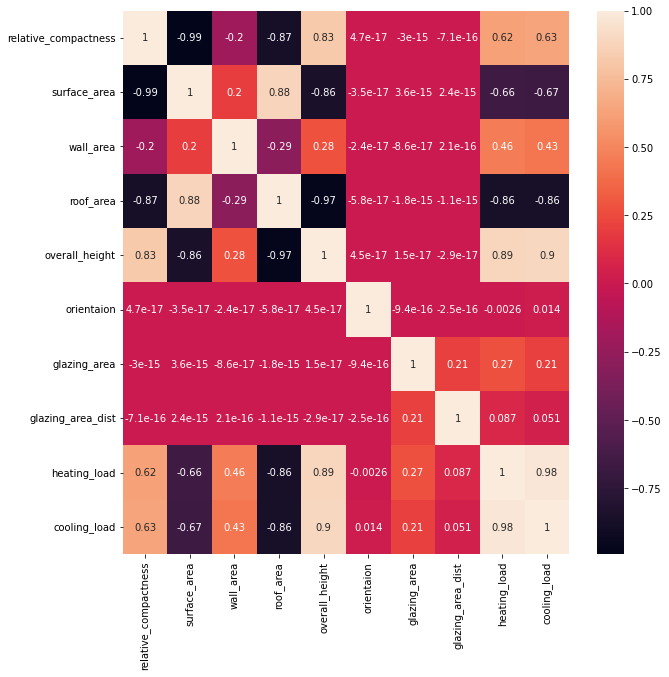

In [30]:
energy_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(energy_data.corr(), annot=True)

In [31]:
energy_data.corr()['cooling_load']

relative_compactness    0.634339
surface_area           -0.672999
wall_area               0.427117
roof_area              -0.862547
overall_height          0.895785
orientaion              0.014290
glazing_area            0.207505
glazing_area_dist       0.050525
heating_load            0.975862
cooling_load            1.000000
Name: cooling_load, dtype: float64

In [32]:
energy_data.corr()['heating_load']

relative_compactness    0.622272
surface_area           -0.658120
wall_area               0.455671
roof_area              -0.861828
overall_height          0.889431
orientaion             -0.002587
glazing_area            0.269841
glazing_area_dist       0.087368
heating_load            1.000000
cooling_load            0.975862
Name: heating_load, dtype: float64

In [33]:
# remove correlated coloumns 
# (relative_compactness or surface_area)
# (roof_area or overall height)
new_energy_data = energy_data.drop(['relative_compactness','roof_area','orientaion','glazing_area_dist'], axis=1)
# new_energy_data=energy_data
new_energy_data.head(2)

,surface_area,wall_area,overall_height,glazing_area,heating_load,cooling_load
0,514.5,294.0,7.0,0.0,15.55,21.33
1,514.5,294.0,7.0,0.0,15.55,21.33


In [34]:
# split for train and test
X=new_energy_data.drop(['heating_load','cooling_load'], axis=1)
Y=new_energy_data[['heating_load','cooling_load']]

In [35]:
X.head(5)

,surface_area,wall_area,overall_height,glazing_area
0,514.5,294.0,7.0,0.0
1,514.5,294.0,7.0,0.0
2,514.5,294.0,7.0,0.0
3,514.5,294.0,7.0,0.0
4,563.5,318.5,7.0,0.0


In [36]:
Y.head(5)

,heating_load,cooling_load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [38]:
x_train.shape,x_train.shape

((537, 4), (537, 4))

In [39]:
# find best
def model_acc(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)


LinearRegression() --> 0.9053870149359547
Lasso() --> 0.790655215064043
DecisionTreeRegressor() --> 0.9829644075923822


In [41]:
# train by LinearRegression()
findload1=lr.fit(x_train,y_train)

In [42]:
findload1.score(x_test, y_test)

0.9053870149359547

In [43]:
pred1 = findload1.predict(x_test)


In [44]:
pred1

array([[ 9.99866205, 13.57372516],
       [13.1146196 , 15.78078807],
       [ 9.18075192, 13.15653358],
       [32.43594253, 34.16398635],
       [32.37444573, 34.18763523],
       [17.48997205, 19.04203467],
       [ 9.99866205, 13.57372516],
       [29.91715273, 32.05561897],
       [30.45282368, 32.17796337],
       [28.8315668 , 30.65786004],
       [13.71178735, 15.8794836 ],
       [32.37444573, 34.18763523],
       [30.45282368, 32.17796337],
       [24.72389015, 28.37718078],
       [13.1146196 , 15.78078807],
       [11.69954172, 15.26490097],
       [28.8315668 , 30.65786004],
       [ 8.73926715, 12.51954147],
       [33.03311028, 34.26268187],
       [38.60636083, 38.60176105],
       [18.74936696, 20.09621837],
       [29.91715273, 32.05561897],
       [30.45282368, 32.17796337],
       [13.1146196 , 15.78078807],
       [12.51745185, 15.68209255],
       [13.1146196 , 15.78078807],
       [15.63340941, 17.88915546],
       [33.56878123, 34.38502628],
       [18.74936696,

In [45]:
y_test.head(15)

,heating_load,cooling_load
274,11.11,14.46
369,12.87,15.85
38,7.10,12.40
352,38.57,43.86
70,32.94,34.14
756,14.96,17.64
275,11.16,14.39
490,28.31,34.15
439,33.28,33.16
432,28.70,29.61
